In [464]:
import numpy as np
import pandas as pd

In [465]:
df1 = pd.read_csv('spam.csv' , encoding ="ISO-8859-1" )
df = pd.read_csv('spam.csv' , encoding ="ISO-8859-1" )
df2 = pd.read_csv('traindata.csv' , encoding ="ISO-8859-1", header=None, names=['ham/spam', 'message'])

In [466]:
df1.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2734,ham,Can you do a mag meeting this avo at some point?,NaN,NaN,NaN
2498,ham,"I know where the &lt;#&gt; is, I'll be there...",NaN,NaN,NaN
3715,ham,Networking technical support associate.,NaN,NaN,NaN
4043,ham,"Yes, my reg is Ciao!",NaN,NaN,NaN
2607,ham,:-) yeah! Lol. Luckily i didn't have a starrin...,NaN,NaN,NaN


In [467]:
# df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [468]:
# renaming the cols
# df1.rename(columns={'v1':'ham/spam','v2':'message'},inplace=True)
# df1.sample(5)
df.rename(columns={'v1':'ham/spam','v2':'message'},inplace=True)
df.sample(5)

,ham/spam,message
685,ham,Have you finished work yet? :)
5127,ham,Cuz ibored. And don wanna study
3586,ham,Our ride equally uneventful - not too many of ...
1121,spam,Do you want 750 anytime any network mins 150 t...
3065,spam,Get a brand new mobile phone by being an agent...


In [469]:
# df = pd.concat([df1, df2], ignore_index=True, names=['', 'Series name', 'Row ID'])

In [470]:
df.sample(5)

,ham/spam,message
5027,ham,Go chase after her and run her over while she'...
718,spam,You have WON a guaranteed å£1000 cash or a å£2...
4535,ham,Never blame a day in ur life. Good days give u...
4939,ham,ÌÏ go home liao? Ask dad to pick me up at 6...
3255,ham,Who were those people ? Were you in a tour ? I...


In [471]:
# check for duplicate values
df.duplicated().sum()

403

In [472]:
#remove duplicate valuse
df = df.drop_duplicates(keep='first')

In [473]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [474]:
df['ham/spam'] = encoder.fit_transform(df['ham/spam'])

In [475]:
df.sample(5)

,ham/spam,message
5196,1,Spook up your mob with a Halloween collection ...
1165,0,"Haha yeah I see that now, be there in a sec"
110,0,What is the plural of the noun research?
5312,0,Here got ur favorite oyster... N got my favori...
3027,0,You have got tallent but you are wasting.


In [476]:
df.shape

(5169, 2)

In [477]:
df.head()

,ham/spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [478]:
df['ham/spam'].value_counts()

0    4516
1     653
Name: ham/spam, dtype: int64

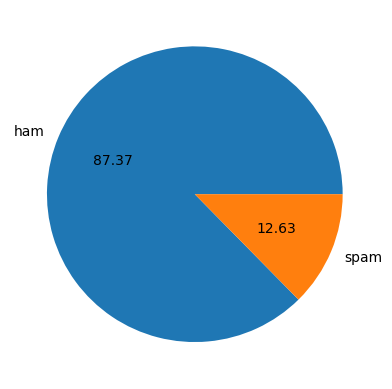

In [479]:
import matplotlib.pyplot as plt
plt.pie(df['ham/spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [480]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [481]:
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [482]:
df.head()

,ham/spam,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [483]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [484]:
#ham message
df[df['ham/spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [485]:
# spam message
df[df['ham/spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [486]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

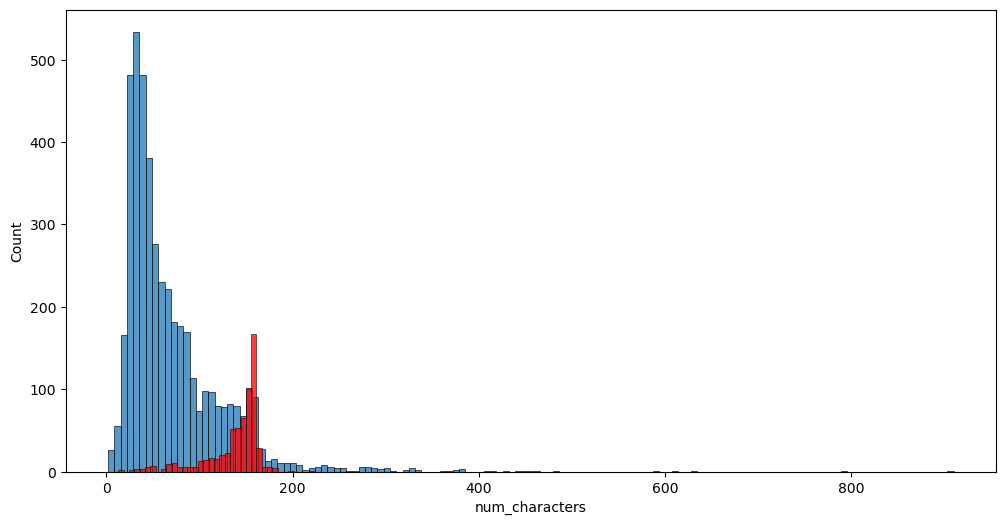

In [487]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_characters'])
sns.histplot(df[df['ham/spam'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

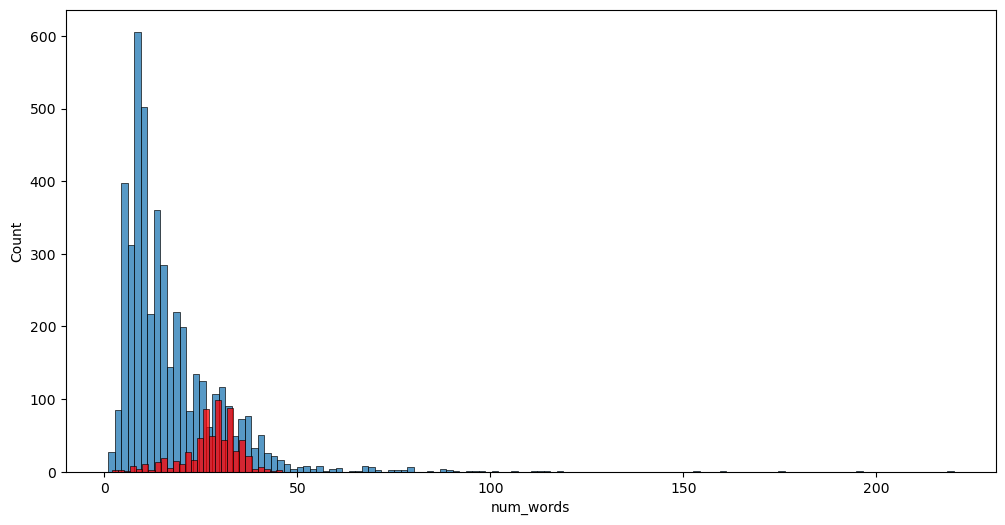

In [488]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_words'])
sns.histplot(df[df['ham/spam'] == 1]['num_words'],color='red')

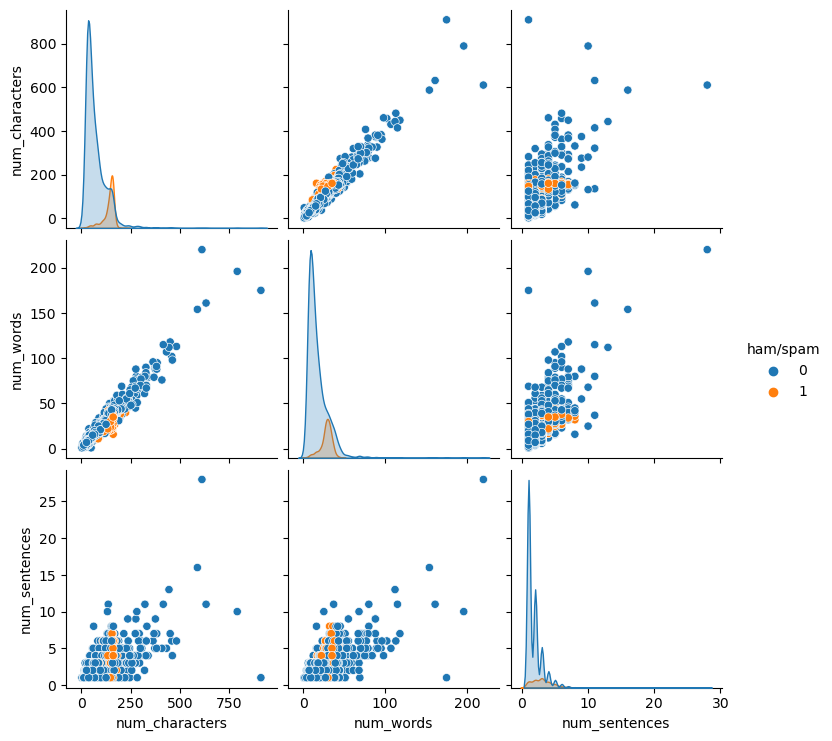

In [489]:
sns.pairplot(df,hue='ham/spam')

<AxesSubplot:>

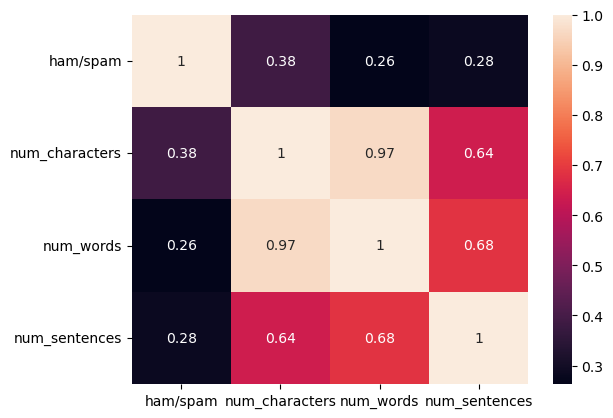

In [490]:
sns.heatmap(df.corr(),annot=True)

In [491]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [492]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [493]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('enjoying')

'enjoy'

In [494]:
df['transformed_message'] = df['message'].apply(transform_message)

In [495]:
df.head()

,ham/spam,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [496]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [497]:
spam_wc = wc.generate(df[df['ham/spam'] == 1]['transformed_message'].str.cat(sep=" "))

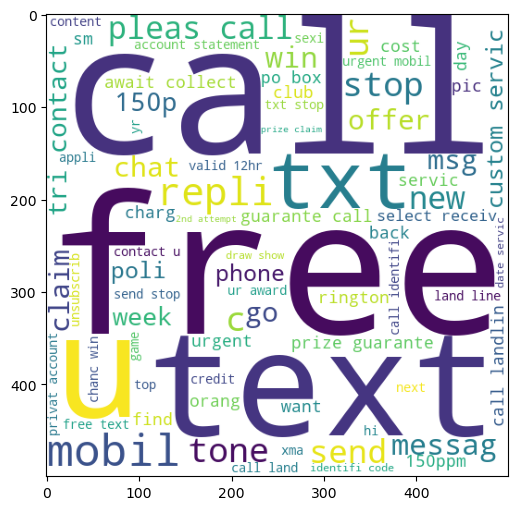

In [498]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [499]:
ham_wc = wc.generate(df[df['ham/spam'] == 0]['transformed_message'].str.cat(sep=" "))

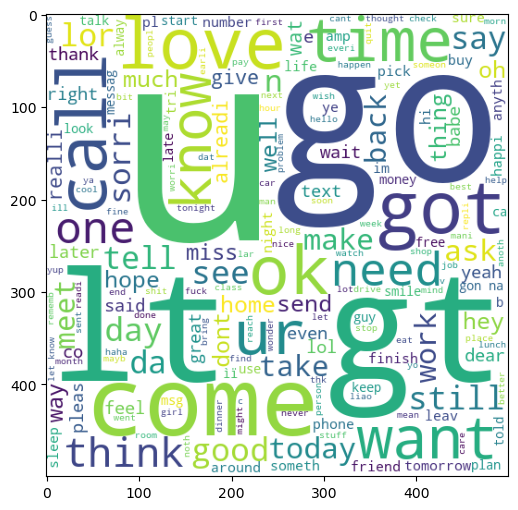

In [500]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [501]:
spam_corpus = []
for msg in df[df['ham/spam'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [502]:
len(spam_corpus)

9939

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


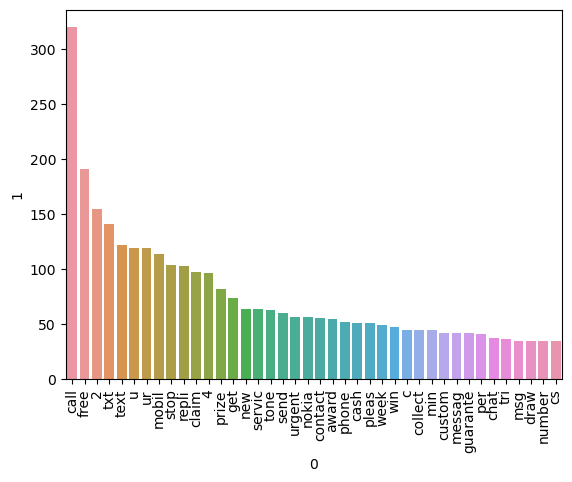

In [503]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(40))[0],pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [504]:
ham_corpus = []
for msg in df[df['ham/spam'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [505]:
len(ham_corpus)

35394

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


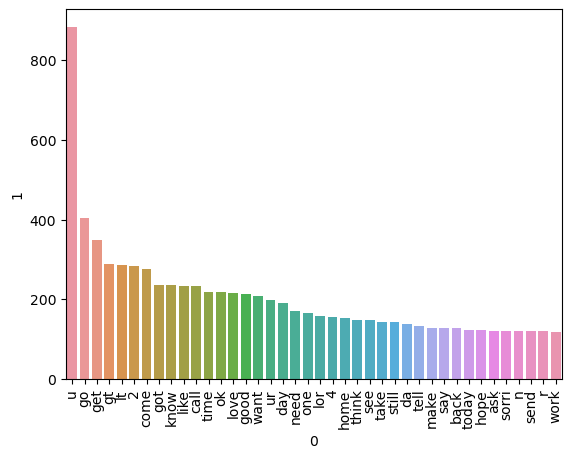

In [506]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(40))[0],pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [507]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [508]:
X = tfidf.fit_transform(df['transformed_message']).toarray()
# X = cv.fit_transform(df['transformed_message']).toarray()

In [509]:
X.shape

(5169, 3000)

In [510]:
y = df['ham/spam'].values

In [511]:
from sklearn.model_selection import train_test_split

In [512]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [513]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [514]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [515]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gnb = GaussianNB()

In [516]:
clfs = {
    'SVC' : svc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,
    'GNB': gnb,   
}

In [517]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [518]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("Algorithm: ",name)
    print("Accuracy % : ",current_accuracy)
    print("Precision % : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Algorithm:  SVC
Accuracy % :  0.9793681495809156
Precision % :  0.9747474747474747
Algorithm:  MNB
Accuracy % :  0.9716312056737588
Precision % :  0.9888888888888889
Algorithm:  DT
Accuracy % :  0.9342359767891683
Precision % :  0.86875
Algorithm:  LR
Accuracy % :  0.9451966473243069
Precision % :  0.8947368421052632
Algorithm:  RF
Accuracy % :  0.970341715022566
Precision % :  0.9943181818181818
Algorithm:  GNB
Accuracy % :  0.8736299161831077
Precision % :  0.5344827586206896


In [449]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [519]:
import pickle
pickle.dump(tfidf,open('gnbvectorizer.pkl','wb'))
pickle.dump(gnb,open('gnb_model.pkl','wb'))

In [520]:
!pip install keras
# import tensorflow
# from tensorflow import keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.sequence import pad_sequences
# from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [521]:
# Preprocess the text data
lstmtokenizer = Tokenizer()
lstmtokenizer.fit_on_texts(df['message'])
sequence = lstmtokenizer.texts_to_sequences(df['message'])
padded_sequence = pad_sequences(sequence, padding='post')

In [522]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(padded_sequence, y, test_size=0.3)

In [523]:
# Build the model
lstmmodel = Sequential()
lstmmodel.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=padded_sequence.shape[1]))
lstmmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstmmodel.add(Dense(1, activation='sigmoid'))

In [524]:
lstmmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 189, 128)          1153152   
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,284,865
Trainable params: 1,284,865
Non-trainable params: 0
_________________________________________________________________


In [525]:
# Compile the model
lstmmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstmmodel.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)


Epoch 1/3
102/102 [==============================] - 30s 275ms/step - loss: 0.4146 - accuracy: 0.8655 - val_loss: 0.3889 - val_accuracy: 0.8729
Epoch 2/3
102/102 [==============================] - 38s 368ms/step - loss: 0.3969 - accuracy: 0.8655 - val_loss: 0.3810 - val_accuracy: 0.8729
Epoch 3/3
102/102 [==============================] - 50s 490ms/step - loss: 0.3967 - accuracy: 0.8655 - val_loss: 0.3832 - val_accuracy: 0.8729


In [526]:


# Evaluate the model
y_pred2 = lstmmodel.predict(X_test)
y_pred2 = [round(x[0]) for x in y_pred2]
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2, average='weighted'))
print("Recall:", recall_score(y_test, y_pred2, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred2, average='weighted'))

49/49 [==============================] - 2s 45ms/step
Accuracy: 0.8910380399742102
Precision: 0.7939487886810822
Recall: 0.8910380399742102
F1 Score: 0.8396962640602513


C:\Users\Legion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [458]:
#To extract the tokenizer and model 
pickle.dump(lstmtokenizer, open("tokenizer.pkl", "wb"))
# pickle.dump(lstmmodel, open("lstm_model.pkl", "wb"))
lstmmodel.save('lstmmodel.h5')